<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/WineQualityDataset/blob/main/SNS_ACT3_5_JohanSantanaGalvan_Red_%26_White_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Johan Santana Galván

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

In [ ]:
red_wine_url = 'https://raw.githubusercontent.com/JohanSantanaGalvanJob/WineQualityDataset/main/winequality-red.csv'
white_wine_url = 'https://raw.githubusercontent.com/JohanSantanaGalvanJob/WineQualityDataset/main/winequality-white.csv'
df = pd.read_csv(white_wine_url, sep=';')
df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Con la información del dataset, podemos ver que hay 1599 registros en total y nosotros vamos a usar el campo "quality" como nuestra variable "Y".

In [4]:
# We will check if there are any null values in this dataset.
null_values = df.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Vamos a ver si hay valores entre tanto número que tenga 0.

In [5]:
count_0_marks = df.apply(lambda x: x.eq(0.0).sum())
print(count_0_marks)

fixed acidity            0
volatile acidity         0
citric acid             19
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64


Vemos que tenemos varios valores 0 en el campo del ácido cítrico. De momento lo voy a dejar como está pero tal vez lo modifique en el futuro.

Quiero ver en un histograma como están distribuidos la calidad de los vinos y su valoración.

<Axes: >

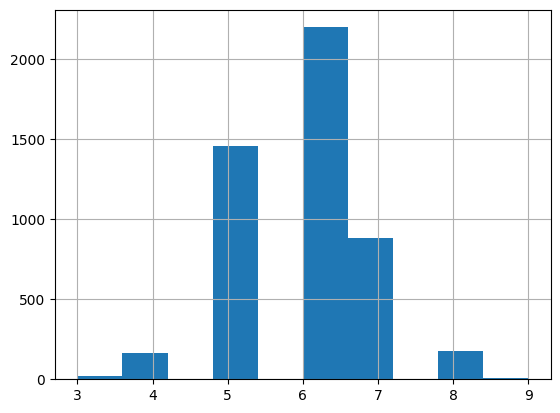

In [6]:
df.quality.hist()

Vemos que el histograma no tiene valores para 1,2,9,10 y que los valores de 3 y 8 son muy bajos.

Ahora voy a crear una gráfica de correlación para ver la relación con los otros datasets.

<Axes: >

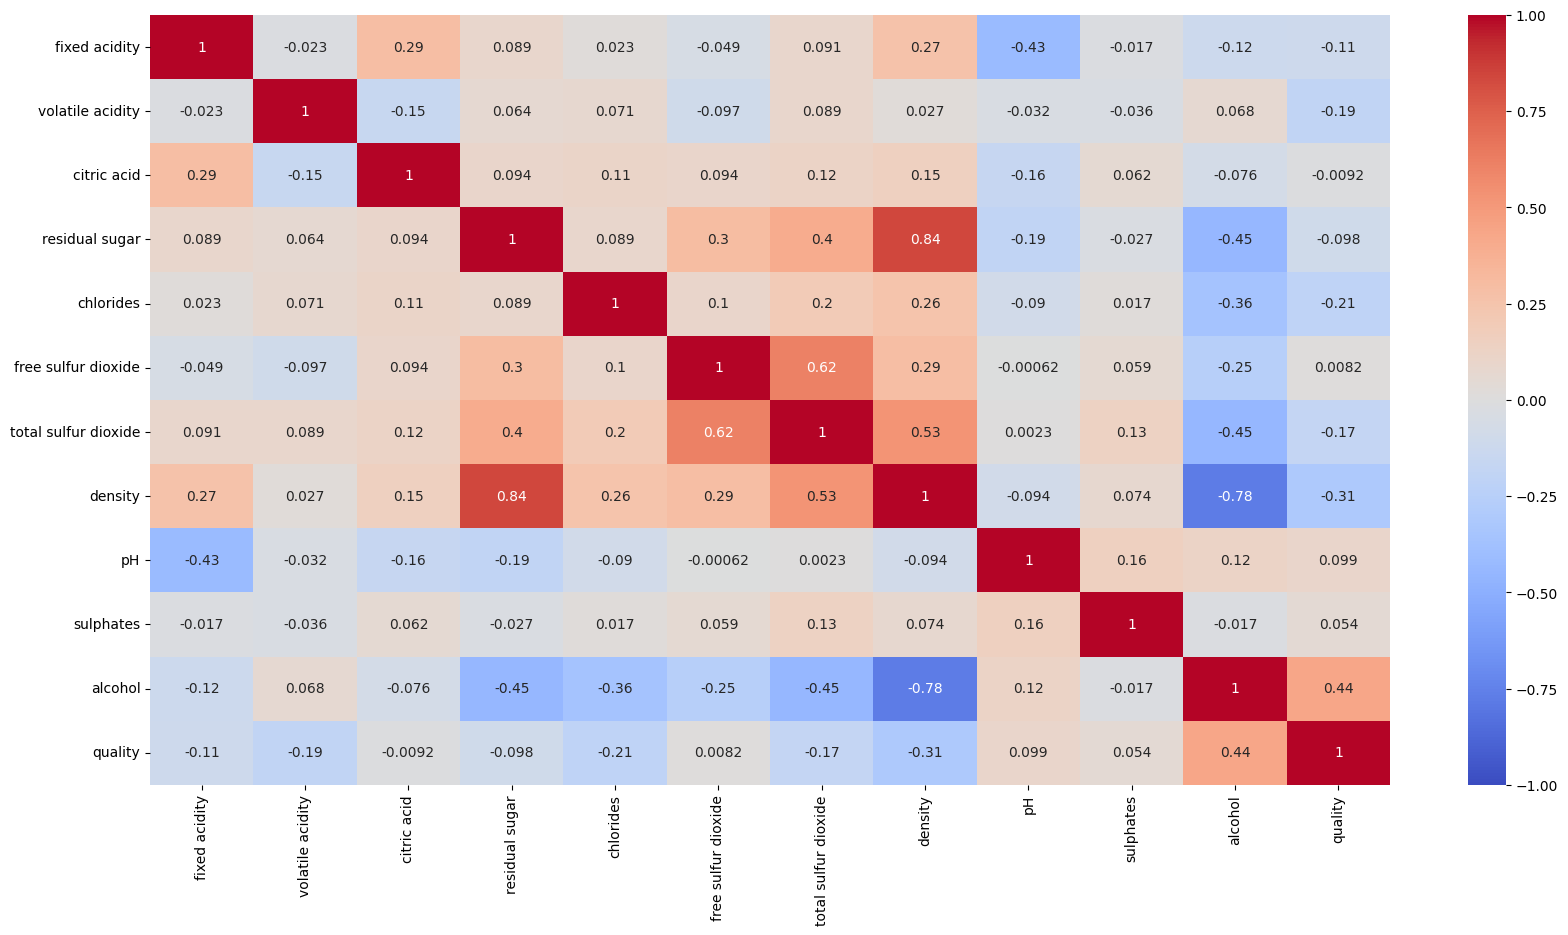

In [7]:
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

Los valores más altos son de 0.67 de correlación por lo que de momento en esta primera instancia lo dejaré así ya que no son valores demasiado altos.

In [8]:
# Ejecutar solo si estamos trabajando con los vinos blancos.
df = df.drop(columns=["density"])

El siguiente paso que realizaré es el KBest.

In [9]:
y = df['quality']

In [10]:
aux = df['quality']
df= df.drop(['quality'], axis=1)
for i in range(1, 6, 1):
  k = i
  selector = SelectKBest(score_func=f_classif, k=k)

  X_new = selector.fit_transform(df, y)

  selected_columns = df.columns[selector.get_support()]

  print("Características seleccionadas:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas:1
Index(['alcohol'], dtype='object')

Características seleccionadas:2
Index(['volatile acidity', 'alcohol'], dtype='object')

Características seleccionadas:3
Index(['volatile acidity', 'total sulfur dioxide', 'alcohol'], dtype='object')

Características seleccionadas:4
Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol'], dtype='object')

Características seleccionadas:5
Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')



Tengo 5 resultados y viéndolos a simple vista parecen los más relevantes en un vino. Desde luego la acidez del vino y su alcohol parecen mediciones relevantes.

In [11]:
# selected_columns = ['volatile acidity', 'citric acid', 'total sulfur dioxide',
#        'sulphates', 'alcohol']

# El selected columns de arriba forma parte de los vinos rojos y el de abajo de los vinos blancos. Se debe comentar uno y descomentar otro

selected_columns = ['volatile acidity', 'residual sugar', 'total sulfur dioxide',
       'chlorides', 'alcohol']

Ahora voy a pasar a escalar los datos ya que tenemos numéricos como alcohol, y otros de centésimas como los cloruros.

In [12]:
X = df[selected_columns]

In [13]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['quality'] = y

In [15]:
df= df_scaled

In [16]:
df

,volatile acidity,residual sugar,total sulfur dioxide,chlorides,alcohol,quality
0,0.186275,0.308282,0.373550,0.106825,0.129032,6
1,0.215686,0.015337,0.285383,0.118694,0.241935,6
2,0.196078,0.096626,0.204176,0.121662,0.338710,6
3,0.147059,0.121166,0.410673,0.145401,0.306452,6
4,0.147059,0.121166,0.410673,0.145401,0.306452,6
...,...,...,...,...,...,...
4893,0.127451,0.015337,0.192575,0.089021,0.516129,6
4894,0.235294,0.113497,0.368910,0.112760,0.258065,5
4895,0.156863,0.009202,0.236659,0.094955,0.225806,6
4896,0.205882,0.007669,0.234339,0.038576,0.774194,7


In [17]:
X = df[selected_columns]

In [18]:
y= df['quality']

Vamos a pasar ahora sí al entrenamiento propiamente dicho.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Vamos a probar con 3 tipos de árboles a ver que clase de resultados podemos obtener aplicándolos junto con el cross Validation.

In [20]:
# Definir los nombres de los modelos y los clasificadores correspondientes
names = ["DecisionTree", "RandomForest", "GradientBoosting"]
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

# Lista para almacenar los puntajes de validación cruzada
cv_scores = []

# Iterar sobre los modelos y calcular los puntajes de validación cruzada
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')
    print("Puntuaciones para {}:".format(name))
    print(scores)
    cv_scores.append(scores)

# Calcular el promedio de los puntajes de validación cruzada para cada modelo
mean_cv_scores = [np.mean(scores) for scores in cv_scores]

# Imprimir los resultados
for i in range(len(names)):
    print("Modelo Con Cross Validation (Con Librería): {} = {:.2f}".format(names[i], mean_cv_scores[i]))


Puntuaciones para DecisionTree:
[0.5344224  0.50875146 0.50991832 0.54609102]
Puntuaciones para RandomForest:
[0.63477246 0.60910152 0.60443407 0.63010502]
Puntuaciones para GradientBoosting:
[0.55775963 0.57176196 0.54609102 0.54259043]
Modelo Con Cross Validation (Con Librería): DecisionTree = 0.52
Modelo Con Cross Validation (Con Librería): RandomForest = 0.62
Modelo Con Cross Validation (Con Librería): GradientBoosting = 0.55


El mejor modelo ha siod RandomForest con un 0.68 (0.62 para los vinos blancos) así que me quedaré con ese. Ahora voy a utilizar una matriz de confusión para pintar los resultados.

Precisión del modelo: 0.6510204081632653


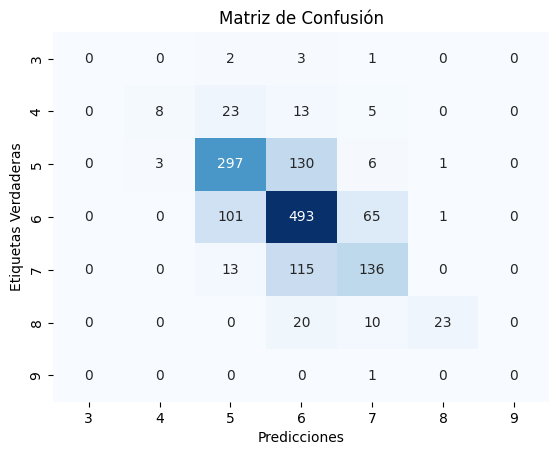

In [21]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels=sorted(y_test.unique())
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_labels, yticklabels=class_labels)

# Añadimos etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", accuracy)

# Mostramos la gráfica
plt.show()

Lo siguiente va a ser guardar el modelo en formato.pkl

In [ ]:
red_wine_filename = "red_wine_model.pkl"
with open(red_wine_filename, 'wb') as file:
    pickle.dump(clf, file)

Ahora nos lo traemos de nuevo para trabajar con él.

In [ ]:
red_wine_filename_loaded = "red_wine_model.pkl"
with open(red_wine_filename_loaded, 'rb') as file:
    model = pickle.load(file)

Vamos a volver a generar una matriz de confusión pero esta vez con los datos predichos del modelo importado a ver si es exactamente igual o no.

Acc 0.6625


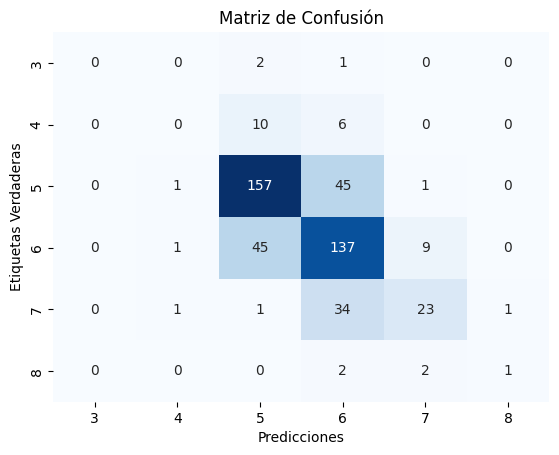

In [ ]:
predicted_class = model.predict(X_test[['volatile acidity', 'citric acid', 'total sulfur dioxide',
       'sulphates', 'alcohol']])
acc = accuracy_score(y_test, predicted_class)
print ('Acc', acc)
conf_matrix = confusion_matrix(y_test, predicted_class)
class_labels=sorted(y_test.unique())
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_labels, yticklabels=class_labels)

# Añadimos etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')

# Mostramos la gráfica
plt.show()

Vemos que conseguimos los mismos datos por lo que se puede validar que el modelo ha sido correctamente importado.